In [6]:
import json
data1 = json.load(open(r'1-1-Formalization\new_training_data\predictions.json'))
data2 = json.load(open(r'1-2-Informalization\task1-2_public_data\predictions.json'))

gt_training_data = []
gt_training_label = []
for i in range(len(data2)):
    name = data2[i]['name']
    formal_proof = data2[i]['formal_proof']
    for j in range(len(data1)):
        if data1[j]['name'] == name:
            informal_statement = data1[j]['informal_statement']
            informal_proof = data1[j]['informal_proof']
            break
    gt_training_data.append({'name': name, 'formal_proof': formal_proof})
    gt_training_label.append({'name': name, 'informal_statement': informal_statement, 'informal_proof': informal_proof})

print(len(gt_training_data)) 
with open(r'1-2-Informalization\task1-2_public_data\gt_training_data.json', 'w') as f:
    json.dump(gt_training_data, f, indent=4)
with open(r'1-2-Informalization\task1-2_public_data\gt_training_label.json', 'w') as f:
    json.dump(gt_training_label, f, indent=4)

50


In [1]:
import json
data1 = json.load(open(r'1-1-Formalization\new_training_data\predictions.json'))
data2 = json.load(open(r'1-2-Informalization\task1-2_public_data\predictions.json'))

gt_training_data = []
gt_training_label = []
for i in range(len(data2)):
    name = data2[i]['name']
    formal_proof = data2[i]['formal_proof']
    for j in range(len(data1)):
        if data1[j]['name'] == name:
            informal_statement = data1[j]['informal_statement']
            informal_proof = data1[j]['informal_proof']
            break
    gt_training_data.append({'name': name, 'informal_statement': informal_statement, 'informal_proof': informal_proof})
    gt_training_label.append({'name': name, 'formal_proof': formal_proof}) 

print(len(gt_training_data),len(gt_training_label)) 
with open(r'1-1-Formalization\new_training_data\gt_training_data.json', 'w') as f:
    json.dump(gt_training_data, f, indent=4)
with open(r'1-1-Formalization\new_training_data\gt_training_label.json', 'w') as f:
    json.dump(gt_training_label, f, indent=4)

50 50


In [7]:
import json
data1 = json.load(open(r'1-1-Formalization\new_training_data\predictions.json'))
data2 = json.load(open(r'1-2-Informalization\task1-2_public_data\output.json'))

process_data_2 = []
from rouge import Rouge

def rouge_l(reference, hypothesis):
    rouge = Rouge()
    scores = rouge.get_scores(hypothesis, reference)
    return scores[0]['rouge-l']['f']

rouge_l_list = []
rouge_l_list_problem = []
rouge_l_list_solution = []

for i in range(len(data1)):
    name = data1[i]['name']
    formal_proof = data2[i]['formal_proof']
    label_problem = data1[i]['informal_statement']
    label_solution = data1[i]['informal_proof']
    pred_problem = data2[i]['problem']
    pred_solution = data2[i]['solution']
    rouge_l_temp_problem = rouge_l(label_problem, pred_problem)
    rouge_l_temp_solution = rouge_l(label_solution, pred_solution)
    # rouge_l_temp = rouge_l(label_problem + " " + label_solution, pred_problem + " "+ pred_solution)
    rouge_l_temp = (rouge_l_temp_problem + rouge_l_temp_solution) / 2
    rouge_l_list.append(rouge_l_temp)
    rouge_l_list_problem.append(rouge_l_temp_problem)
    rouge_l_list_solution.append(rouge_l_temp_solution)
    
    process_data_2.append({'name': name,
                            'formal_proof': formal_proof
                            ,'pred_problem': pred_problem
                            ,'pred_solution': pred_solution
                            ,'label_problem': label_problem
                            ,'label_solution': label_solution,
                            'rouge_l': rouge_l_temp,
                            })
print(len(rouge_l_list))
print('Average rouge-l:', sum(rouge_l_list) / len(rouge_l_list))
print('Average rouge-l problem:', sum(rouge_l_list_problem) / len(rouge_l_list_problem))
print('Average rouge-l solution:', sum(rouge_l_list_solution) / len(rouge_l_list_solution))
# save data
with open(r'1-2-Informalization\task1-2_public_data\analyse_test.json', 'w') as f:
    json.dump(process_data_2, f, indent=4)
print('Done!')


50
Average rouge-l: 0.7688080385465638
Average rouge-l problem: 0.807723866600338
Average rouge-l solution: 0.7298922104927894
Done!


[4, 21, 7, 30, 23, 26, 12, 41, 29, 15]
4 : 0.09859154679627063
21 : 0.30183562324740126
7 : 0.31310860940664126
30 : 0.3200899500681462
23 : 0.3454391845864055
26 : 0.4053718317142513
12 : 0.40579083359451074
41 : 0.4109608697407642
29 : 0.4208156729864977
15 : 0.42980436812373046
50


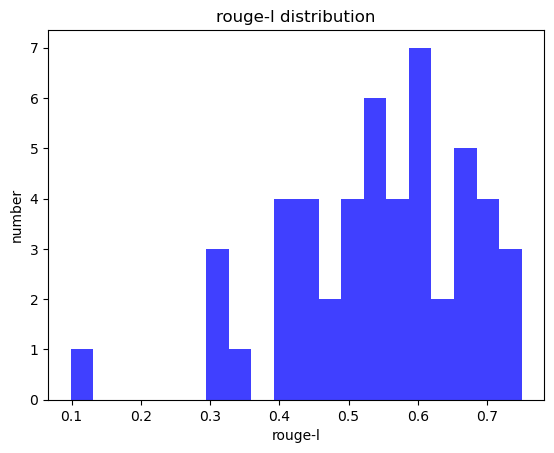

In [27]:

# 输出最低的5个rouge-l对应的数据
import numpy as np
rouge_l_list = np.array(rouge_l_list)
index = rouge_l_list.argsort()[:10]
print(list(index))
for i in index:
    print(i , ':', rouge_l_list[i])

# 画出直方图rouge_l_list, bins=20
print(len(rouge_l_list))
import matplotlib.pyplot as plt
plt.hist(rouge_l_list, bins=20, alpha=0.75, color='b')
plt.xlabel('rouge-l')
plt.ylabel('number')
plt.title('rouge-l distribution')
plt.show()


In [4]:
from nltk.translate.bleu_score import sentence_bleu

def rouge_l(reference, hypothesis):
    return sentence_bleu([reference], hypothesis)

# Example usage:
reference = "The quick brown fox jumps over the lazy dog"
hypothesis = "A quick brown fox jumps over a lazy dog"
rouge_l_score = rouge_l(reference, hypothesis)
print("Rouge-L score:", rouge_l_score)


Rouge-L score: 0.8168742752866068


In [5]:
import json
data1 = json.load(open(r'1-1-Formalization\new_training_data\predictions.json'))
data2 = json.load(open(r'1-2-Informalization\task1-2_public_data\predictions.json'))

names = []
def extact_info(name):
    element_concepts = {
            "1st_grade": {
                "Place value",
                "Addition and subtraction",
                "Measurement, data, and geometry",
            },
            
            "2nd_grade": {
                "Add and subtract within 20",
                "Place value",
                "Add and subtract within 100",
                "Add and subtract within 1,000",
                "Money and time",
                "Measurement",
                "Data",
                "Geometry",
            },
            
            "3rd_grade": {
                "Intro to multiplication",
                "1-digit multiplication",
                "Addition, subtraction, and estimation",
                "Intro to division",
                "Understand fractions",
                "Equivalent fractions and comparing fractions",
                "More with multiplication and division",
                "Arithmetic patterns and problem solving",
                "Quadrilaterals",
                "Area",
                "Perimeter",
                "Time",
                "Measurement",
                "Represent and interpret data",
            },
            
            "4th_grade": {
                "Place value",
                "Addition, subtraction, and estimation",
                "Multiply by 1-digit numbers",
                "Multiply by 2-digit numbers",
                "Division",
                "Factors, multiples and patterns",
                "Equivalent fractions and comparing fractions",
                "Add and subtract fractions",
                "Multiply fractions",
                "Understand decimals",
                "Plane figures",
                "Measuring angles",
                "Area and perimeter",
                "Units of measurement",
            },

            "5th_grade": {
                "Decimal place value",
                "Add decimals",
                "Subtract decimals",
                "Add and subtract fractions",
                "Multi-digit multiplication and division",
                "Multiply fractions",
                "Divide fractions",
                "Multiply decimals",
                "Divide decimals",
                "Powers of ten",
                "Volume",
                "Coordinate plane", 
                "Algebraic thinking",
                "Converting units of measure",
                "Line plots",
                "Properties of shapes",
            },
            
            "6th_grade": {
                "Ratios",
                "Arithmetic with rational numbers",
                "Rates and percentages",
                "Exponents and order of operations",
                "Negative numbers",
                "Variables & expressions",
                "Equations & inequalities",
                "Plane figures",
            }
        }

    middle_concepts = {
        "7th_grade": {
            "Negative numbers: addition and subtraction",
            "Negative numbers: multiplication and division",
            "Fractions, decimals, & percentages",
            "Rates & proportional relationships",
            "Expressions, equations, & inequalities",
            "Geometry",
            "Statistics and probability",
        },
        
        "8th_grade": {
            "Numbers and operations",
            "Solving equations with one unknown",
            "Linear equations and functions",
            "Systems of equations",
            "Geometry",
            "Geometric transformations",
            "Data and modeling",
        },
        
        "Algebra_basics": {
            "Foundations",
            "Algebraic expressions",
            "Linear equations and inequalities",
            "Graphing lines and slope",
            "Systems of equations",
            "Expressions with exponents",
            "Quadratics and polynomials",
            "Equations and geometry",
        },
        
        "Pre-algebra": {
            "Factors and multiples",
            "Patterns",
            "Ratios and rates",
            "Percentages",
            "Exponents intro and order of operations",
            "Variables & expressions",
            "Equations & inequalities introduction",
            "Percent & rational number word problems",
            "Proportional relationships",
            "One-step and two-step equations & inequalities",
            "Roots, exponents, & scientific notation",
            "Multi-step equations",
            "Two-variable equations",
            "Functions and linear models",
            "Systems of equations",
        },
        
        "Basic geometry and measurement": {
            "Intro to area and perimeter",
            "Intro to mass and volume",
            "Measuring angles",
            "Plane figures",
            "Units of measurement",
            "Volume",
            "Coordinate plane",
            "Decomposing to find area",
            "3D figures",
            "Circles, cylinders, cones, and spheres",
            "Angle relationships",
            "Scale",
            "Triangle side lengths",
            "Geometric transformations",
        },
    }

    high_concepts = {
        "Algebra_1": {
            "Algebra foundations",
            "Solving equations & inequalities",
            "Working with units",
            "Linear equations & graphs",
            "Forms of linear equations",
            "Systems of equations",
            "Inequalities (systems & graphs)",
            "Functions",
            "Sequences",
            "Absolute value & piecewise functions",
            "Exponents & radicals",
            "Exponential growth & decay",
            "Quadratics: Multiplying & factoring",
            "Quadratic functions & equations",
            "Irrational numbers",
            "Creativity in algebra",
        },

        "Algebra_2": {
            "Polynomial arithmetic",
            "Complex numbers",
            "Polynomial factorization",
            "Polynomial division",
            "Polynomial graphs",
            "Rational exponents and radicals",
            "Exponential models",
            "Logarithms",
            "Transformations of functions",
            "Equations",
            "Trigonometry",
            "Modeling",
        },

        "High_school_geometry": {
            "Performing transformations",
            "Transformation properties and proofs",
            "Congruence",
            "Similarity",
            "Right triangles & trigonometry",
            "Analytic geometry",
            "Conic sections",
            "Circles",
            "Solid geometry",
        },

        "Trigonometry": {
            "Right triangles & trigonometry",
            "Trigonometric functions",
            "Non-right triangles & trigonometry",
            "Trigonometric equations and identities",
        },

        "Statistics_and_probability": {
            "Analyzing categorical data",
            "Displaying and comparing quantitative data",
            "Summarizing quantitative data",
            "Modeling data distributions",
            "Exploring bivariate numerical data",
            "Study design",
            "Probability",
            "Counting, permutations, and combinations",
            "Random variables",
            "Sampling distributions",
            "Confidence intervals",
            "Significance tests (hypothesis testing)",
            "Two-sample inference for the difference between groups",
            "Inference for categorical data (chi-square tests)",
            "Advanced regression (inference and transforming)",
            "Analysis of variance (ANOVA)",
        },

        "High_school_statistics": {
            "Displaying a single quantitative variable",
            "Analyzing a single quantitative variable",
            "Two-way tables",
            "Scatterplots",
            "Study design",
            "Probability",
            "Probability distributions & expected value",
        },

        "Precalculus": {
            "Composite and inverse functions",
            "Trigonometry",
            "Complex numbers",
            "Rational functions",
            "Conic sections",
            "Vectors",
            "Matrices",
            "Probability and combinatorics",
            "Series",
            "Limits and continuity",
        },

        "Calculus_1": {
            "Limits and continuity",
            "Derivatives: definition and basic rules",
            "Derivatives: chain rule and other advanced topics",
            "Applications of derivatives",
            "Analyzing functions",
            "Integrals",
            "Differential equations",
            "Applications of integrals",
        },

        "Calculus_2": {
            "Integrals review",
            "Integration techniques",
            "Differential equations",
            "Applications of integrals",
            "Parametric equations, polar coordinates, and vector-valued functions",
            "Series",
        },
    }

    higher_concepts = {
        "AP_College_Statistics": {
            "Exploring categorical data",
            "Exploring one-variable quantitative data: Displaying and describing",
            "Exploring one-variable quantitative data: Summary statistics",
            "Exploring one-variable quantitative data: Percentiles, z-scores, and the normal distribution",
            "Exploring two-variable quantitative data",
            "Collecting data",
            "Probability",
            "Random variables and probability distributions",
            "Sampling distributions",
            "Inference for categorical data: Proportions",
            "Inference for quantitative data: Means",
            "Inference for categorical data: Chi-square",
            "Inference for quantitative data: slopes",
            "Prepare for the 2022 AP Statistics Exam",
        },

        "College_Algebra": {
            "Linear equations and inequalities",
            "Graphs and forms of linear equations",
            "Functions",
            "Quadratics: Multiplying and factoring",
            "Quadratic functions and equations",
            "Complex numbers",
            "Exponents and radicals",
            "Rational expressions and equations",
            "Relating algebra and geometry",
            "Polynomial arithmetic",
            "Advanced function types",
            "Transformations of functions",
            "Rational exponents and radicals",
            "Logarithms",
        },

        "Differential_Calculus": {
            "Limits and continuity",
            "Derivatives: definition and basic rules",
            "Derivatives: chain rule and other advanced topics",
            "Applications of derivatives",
            "Analyzing functions",
            "Parametric equations, polar coordinates, and vector-va",
        },

        "Integral_Calculus": {
            "Integrals",
            "Differential equations",
            "Applications of integrals",
            "Parametric equations, polar coordinates, and vector-valued functions",
            "Series",
        },

        "AP_College_Calculus_AB": {
            "Limits and continuity",
            "Differentiation: definition and basic derivative rules",
            "Differentiation: composite, implicit, and inverse functions",
            "Contextual applications of differentiation",
            "Applying derivatives to analyze functions",
            "Integration and accumulation of change",
            "Differential equations",
            "Applications of integration",
            "AP Calculus AB solved free response questions from past exams",
            "AP Calculus AB Standards mappings",
        },

        "AP_College_Calculus_BC": {
            "Limits and continuity",
            "Differentiation: definition and basic derivative rules",
            "Differentiation: composite, implicit, and inverse functions",
            "Contextual applications of differentiation",
            "Applying derivatives to analyze functions",
            "Integration and accumulation of change",
            "Differential equations",
            "Applications of integration",
            "Parametric equations, polar coordinates, and vector-valued functions",
            "Infinite sequences and series",
            "AP Calculus BC solved exams",
            "AP Calculus BC Standards mappings",
        },

        "Multivariable_calculus": {
            "Thinking about multivariable functions",
            "Derivatives of multivariable functions",
            "Applications of multivariable derivatives",
            "Integrating multivariable functions",
            "Green's, Stokes', and the divergence theorems",
        },

        "Differential_equations": {
            "First order differential equations",
            "Second order linear equations",
            "Laplace transform",
        },

        "Linear_algebra": {
            "Vectors and spaces",
            "Matrix transformations",
            "Alternate coordinate systems (bases)",
        },

    }

    conceptDict = {
            "higher_edu": higher_concepts,
            "high_school": high_concepts,
            "middle_school": middle_concepts,
            "elementary_school": element_concepts,
        }

    qtypes_starter = {
                "word_problem": "Please create a word problem",
                "theorem_proving": "Please create a theorem proving problem", 
            }
    qlevels = {
                "higher_edu": "in the level of higher education",
                "high_school": "in the level of high school",
                "middle_school": "in the level of middle school",
                "elementary_school": "in the level of elementary school",
            }
    name2qlevel = {
        "ELEM_": "elementary_school",
        "MIDD_": "middle_school",
        "HIGH_": "high_school",
        "HEDU_": "higher_edu",
    }
    
    concept = None
    qtype = None
    qlevel = None
    for key in name2qlevel.keys():
        if key in name:
            qlevel = name2qlevel[key]
            break
    if not qlevel:
        print(name)
        return None
    for key in qtypes_starter.keys():
        if key in name:
            qtype = key
            break
    if not qtype:
        print(name)
        return None
    for key in conceptDict[qlevel].keys():
        if key in name:
            concept = key
            break
    if not concept:
        print(name)
        return None
    question_info = qtypes_starter[qtype] + " " + qlevels[qlevel] + f" based on the concept `{concept}`." + f"All knowledge points in {concept} are {list(conceptDict[qlevel][concept])}. The problem may be based on 1-2 knowledge points, you should according to specific formal solution to determine them." 
    return question_info

for i in range(len(data1)):
    name = data1[i]['name']
    # 根据name分析出concept、qtype、qlevel
    
    names.append({'name': name, 'concept': concept, 'qtype': qtype, 'qlevel': qlevel})

print(len(data1),len(names))


correct_by_msg__word_problem_2nd_grade_52_round1
new_step_formalans_kwgiven__theorem_proving_5th_grade_127
new_step_formalans_kwgiven__word_problem_8th_grade_78
correct_by_msg__theorem_proving_AP_College_Statistics_123_round1
50 46


In [29]:
from collections import Counter
import re
data = json.load(open(r'1-2-Informalization\task1-2_public_data\training_label.json'))
problems = [d["informal_statement"] for d in data]
solutions = [d["informal_proof"] for d in data]

stop_words = "stop_words.txt"
# 按照每行读取停用词
with open(stop_words, "r") as f:
    stop_words = f.read().splitlines()

def get_top_20_words(corpus):
    # Remove punctuation and special characters, then tokenize the corpus into words
    words = re.findall(r'\b\w+\b', re.sub(r'[^\w\s]', '', corpus.lower()))
    
    # Filter out stopwords and single-digit numbers
    filtered_words = [word for word in words if word not in stop_words and not word.isdigit() and len(word) > 1]
    
    # Count the frequency of each filtered word
    word_counts = Counter(filtered_words)

    
    # Get the top 10 most common words
    top_20_words = word_counts.most_common(80)
    
    return top_20_words

# Get the top 10 most common words in the problem and solution corpora
top_20_words_problem = get_top_20_words(" ".join(problems) + " " + " ".join(solutions))


# 输出word的list
print([word for word, count in top_20_words_problem])

['number', 'john', 'length', 'total', 'find', 'can', 'apples', 'area', 'units', 'meters', 'equation', 'students', 'first', 'square', 'width', 'rectangle', 'garden', 'function', 'need', 'will', 'given', 'gives', 'feet', 'cm', 'fx', 'sides', 'side', 'point', 'value', 'equal', 'derivative', 'numbers', 'multiply', '2x', 'left', 'add', 'line', 'sum', 'perimeter', 'equals', 'rectangular', 'solve', 'calculate', 'subtract', 'lets', 'hours', 'amount', 'times', 'pizza', 'multiplying', 'degrees', 'money', 'marbles', 'calculated', 'angle', 'who', 'divide', 'second', 'wants', 'new', 'now', 'formula', 'candies', 'volume', 'mary', 'place', '3x', 'prove', 'triangle', 'problem', 'case', 'substitute', 'box', 'fence', 'cost', 'friend', 'alice', 'know', 'equations', 'ab']
